کد مربوطه به مقاله ارسالی با عنوان:

### ترکیب روش آسیب مغزی بهینه و منظم‌سازی تُنُک ‌ در کوچک‌سازی یک مدل یادگیری عمیق

به لحاظ ماهیت تصادفی مقداردهی اولیه‌ی وزنهای شبکه‌های عصبی و روال آموزش شبکه، اختلافات جزیی در اجراهای مختلف وجود دارد.

M. Amintoosi, m.amintoosi at gmail.com

In [1]:
import os, time
if hasattr(time, 'tzset'):
    os.environ['TZ'] = 'Asia/Tehran'
    time.tzset()
print(time.strftime('%Y/​%m/%d, %X'))

2021/​06/16, 05:46:59


In [2]:
import torch
torch.manual_seed(1)
import random
random.seed(1)

In [5]:
!pip install pycm

     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 573kB 9.9MB/s 


In [ ]:
!git clone https://github.com/mamintoosi/Reg-OBD-for-VGG-Pruning

In [ ]:
%cd Reg-OBD-for-VGG-Pruning

In [ ]:
!ls models

In [8]:
%%time
# Transfer Learning: Train the VGG16 model
torch.manual_seed(1)
random.seed(1)
# Download a pre-trained VGG16 model and train it
%run finetune_SpReg_pds.py --train --use-cuda \
  --train_epoch 10 --ds_name 'MNIST' \
  --output_model 'vgg'

MNIST


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



Using CUDA...



Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Accuracy on  val :0.966 	 Loss:0.117
Accuracy on  val :0.966 	 Loss:0.090
Accuracy on  val :0.978 	 Loss:0.089
Accuracy on  val :0.965 	 Loss:0.105
Accuracy on  val :0.977 	 Loss:0.094
Accuracy on  val :0.969 	 Loss:0.124
Accuracy on  val :0.980 	 Loss:0.067
Accuracy on  val :0.980 	 Loss:0.085
Accuracy on  val :0.980 	 Loss:0.083
Accuracy on  val :0.976 	 Loss:0.086

Finished fine tuning.
Accuracy on  test :0.975 	 Loss:0.079
CPU times: user 6min 58s, sys: 18 s, total: 7min 16s
Wall time: 12min 19s


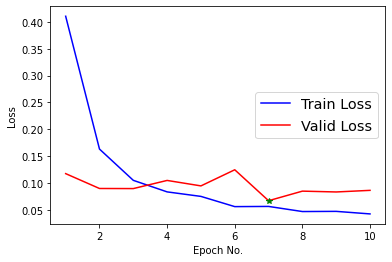

6


In [9]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,len(Train_loss)+1), Train_loss, label='Train Loss', color='blue')
ax.plot(np.arange(1,len(Train_loss)+1), Val_loss, label='Valid Loss', color = 'red')
ax.plot(np.argmin(Val_loss)+1, np.min(Val_loss),'g*')
# legend = ax.legend(loc='upper right', fontsize='x-large')
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.show()
print(np.argmin(Val_loss))

MNIST
Using CUDA...
Accuracy on  test :0.976 	 Loss:0.071
ACC=0.98
0:0.99	1:1.00	2:0.97	3:0.99	4:1.00	5:0.96	6:0.98	7:0.99	8:1.00	9:0.99
FNR:0.03, FPR:0.00
TNR:1.00, TPR:0.97
CPU times: user 4.58 s, sys: 705 ms, total: 5.29 s
Wall time: 5.87 s


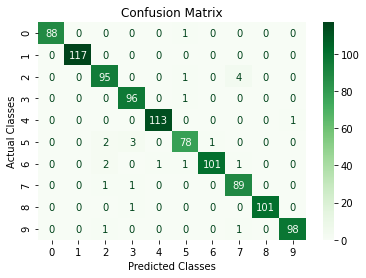

In [11]:
%%time
# Test report the trained model 
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'MNIST' \
  --input_model 'vgg' --output_model 'vgg'

In [ ]:
!ls -as models

total 524648
     4 .       4 ..       0 for_models.txt  524640 vgg.pt


In [12]:
%%time
# Pruning the trained model using HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --train_epoch 20 --reg_name 'HSQGL12' --ds_name 'MNIST' \
  --input_model 'vgg' --output_model 'HSQGL12' --landa 1e-5

MNIST
Using CUDA...
Using Regularization:  HSQGL12
Accuracy on  val :0.980 	 Loss:0.067
Retraining with regularization ... 


Accuracy on  val :0.965 	 Loss:0.123
Accuracy on  val :0.988 	 Loss:0.054
Accuracy on  val :0.979 	 Loss:0.090
Accuracy on  val :0.965 	 Loss:0.098
Accuracy on  val :0.976 	 Loss:0.063
Accuracy on  val :0.976 	 Loss:0.070
Accuracy on  val :0.964 	 Loss:0.091
Accuracy on  val :0.982 	 Loss:0.057
Accuracy on  val :0.984 	 Loss:0.055
Accuracy on  val :0.969 	 Loss:0.107
Accuracy on  val :0.973 	 Loss:0.084
Accuracy on  val :0.989 	 Loss:0.033
Accuracy on  val :0.983 	 Loss:0.053
Accuracy on  val :0.985 	 Loss:0.056
Accuracy on  val :0.974 	 Loss:0.076
Accuracy on  val :0.977 	 Loss:0.057
Accuracy on  val :0.977 	 Loss:0.060
Accuracy on  val :0.979 	 Loss:0.056
Accuracy on  val :0.987 	 Loss:0.039
Accuracy on  val :0.975 	 Loss:0.062

Finished fine tuning.
Accuracy on  test :0.974 	 Loss:0.082
CPU times: user 32min 58s, sys: 27.1 s, total: 33min 25s
Wall time: 33min 43s


MNIST
Using CUDA...
Accuracy on  test :0.981 	 Loss:0.071
ACC=0.98
0:0.99	1:1.00	2:1.00	3:0.99	4:0.99	5:0.98	6:0.97	7:0.98	8:1.00	9:1.00
FNR:0.02, FPR:0.00
TNR:1.00, TPR:0.98
CPU times: user 4.92 s, sys: 647 ms, total: 5.57 s
Wall time: 5.69 s


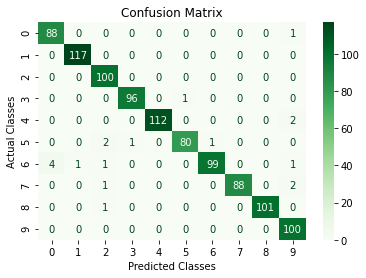

In [13]:
%%time
# Test report for HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'MNIST' \
  --input_model 'HSQGL12' --output_model 'HSQGL12'

In [14]:
!ls -as models

total 1049288
     4 .       4 ..       0 for_models.txt  524640 HSQGL12.pt  524640 vgg.pt


In [15]:
# Pruning the trained model using OBD method
%%time
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --ds_name 'MNIST' \
  --input_model 'vgg' --output_model 'OBD' \
  --eat 3

MNIST
Using CUDA...
Accuracy on  val :0.980 	 Loss:0.067
5
Number of prunning iterations to reduce 70% filters: 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {0: 13, 10: 13, 17: 74, 28: 55, 26: 60, 24: 69, 14: 24, 21: 83, 12: 22, 7: 7, 19: 81, 5: 8, 2: 3}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy on  val :0.979 	 Loss:0.072
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.972 	 Loss:0.088
Accuracy on  val :0.968 	 Loss:0.129
Accuracy on  val :0.963 	 Loss:0.128

Finished fine tuning.
Iter:  2 / 5
Ranking filters.. 
Layers that will be prunned {28: 67, 26: 73, 12: 32, 5: 4, 21: 94, 14: 23, 17: 68, 24: 50, 19: 67, 7: 10, 0: 2, 2: 4, 10: 18}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy on  val :0.967 	 Loss:0.129
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.976 	 Loss:0.067
Accuracy on  val :0.980 	 Loss:0.067
Accuracy on  val :0.978 	 Loss:0.073

Finished fine tuning.
Iter:  3 / 5
Ranking filters.. 
Layers that will be prunned {26: 65, 7: 16, 28: 69, 19: 69, 21: 75, 14: 35, 17: 65, 2: 7, 24: 59, 12: 33, 10: 16, 5: 3}
Prunning filters.. 
Filters prunned 36.36363636363637%
Accuracy on  val :0.979 	 Loss:0.070
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.987 	 Loss:0.042
Accuracy on  val :0.976 	 Loss:0.093
Accuracy on  val :0.977 	 Loss:0.066

Finished fine tuning.
Iter:  4 / 5
Ranking filters.. 
Layers that will be prunned {12: 36, 24: 55, 21: 57, 17: 59, 28: 74, 10: 28, 2: 10, 26: 64, 7: 16, 19: 68, 14: 32, 0: 5, 5: 8}
Prunning filters.. 
Filters prunned 48.484848484848484%
Accuracy on  val :0.966 	 Loss:0.116
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.976 	 Loss:0.077
Accuracy on  val :0.987 	 Loss:0.060
Accuracy on  val :0.989 	 Loss:0.038

Finished fine tuning.
Iter:  5 / 5
Ranking filters.. 
Layers that will be prunned {21: 48, 28: 63, 2: 11, 24: 91, 17: 56, 19: 62, 14: 31, 5: 16, 7: 11, 26: 63, 12: 29, 10: 27, 0: 4}
Prunning filters.. 
Filters prunned 60.60606060606061%
Accuracy on  val :0.967 	 Loss:0.128
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.986 	 Loss:0.052
Accuracy on  val :0.981 	 Loss:0.061
Accuracy on  val :0.987 	 Loss:0.037

Finished fine tuning.
Accuracy on  test :0.979 	 Loss:0.071
CPU times: user 30min, sys: 34.4 s, total: 30min 35s
Wall time: 30min 54s


MNIST
Using CUDA...
Accuracy on  test :0.979 	 Loss:0.071
ACC=0.98
0:0.99	1:1.00	2:0.99	3:0.99	4:0.99	5:0.99	6:0.97	7:0.99	8:0.98	9:1.00
FNR:0.02, FPR:0.00
TNR:1.00, TPR:0.98
CPU times: user 2.49 s, sys: 492 ms, total: 2.99 s
Wall time: 3.36 s


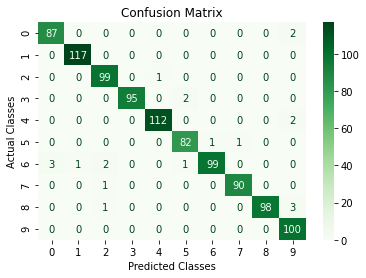

In [16]:
%%time
# Test report for OBD method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'MNIST' \
  --input_model 'OBD' --output_model 'OBD'

In [21]:
!ls -as models

total 1594884
     4 .        0 for_models.txt  524640 HSQGL12.pt  524640 vgg.pt
     4 ..  327688 HSQGL12_OBD.pt  217908 OBD.pt


In [17]:
%%time
# Train HSQGL12_OBD
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --ds_name 'MNIST' \
  --input_model 'HSQGL12' --output_model 'HSQGL12_OBD' \
  --eat 3 

MNIST
Using CUDA...
Accuracy on  val :0.989 	 Loss:0.033
5
Number of prunning iterations to reduce 70% filters: 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {0: 11, 2: 2, 5: 6, 7: 8, 10: 30, 12: 27, 14: 20, 17: 106, 19: 107, 21: 77, 24: 50, 26: 50, 28: 18}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy on  val :0.989 	 Loss:0.033
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.979 	 Loss:0.073
Accuracy on  val :0.971 	 Loss:0.076
Accuracy on  val :0.984 	 Loss:0.052

Finished fine tuning.
Iter:  2 / 5
Ranking filters.. 
Layers that will be prunned {7: 3, 10: 15, 12: 35, 14: 29, 17: 70, 19: 88, 21: 94, 24: 70, 26: 71, 28: 37}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy on  val :0.984 	 Loss:0.052
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.987 	 Loss:0.043
Accuracy on  val :0.982 	 Loss:0.070
Accuracy on  val :0.987 	 Loss:0.057

Finished fine tuning.
Iter:  3 / 5
Ranking filters.. 
Layers that will be prunned {5: 2, 10: 16, 12: 34, 14: 33, 17: 85, 19: 54, 21: 76, 24: 62, 26: 93, 28: 42, 7: 15}
Prunning filters.. 
Filters prunned 36.36363636363637%
Accuracy on  val :0.987 	 Loss:0.057
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.982 	 Loss:0.072
Accuracy on  val :0.986 	 Loss:0.053
Accuracy on  val :0.981 	 Loss:0.057

Finished fine tuning.
Iter:  4 / 5
Ranking filters.. 
Layers that will be prunned {7: 23, 10: 32, 12: 30, 17: 72, 19: 66, 21: 47, 24: 66, 26: 72, 28: 51, 14: 34, 2: 9, 5: 9, 0: 1}
Prunning filters.. 
Filters prunned 48.484848484848484%
Accuracy on  val :0.981 	 Loss:0.057
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.990 	 Loss:0.053
Accuracy on  val :0.987 	 Loss:0.046
Accuracy on  val :0.982 	 Loss:0.057

Finished fine tuning.
Iter:  5 / 5
Ranking filters.. 
Layers that will be prunned {2: 18, 21: 78, 26: 78, 24: 63, 7: 17, 10: 35, 28: 39, 12: 22, 17: 51, 5: 23, 19: 57, 14: 24, 0: 7}
Prunning filters.. 
Filters prunned 60.60606060606061%
Accuracy on  val :0.982 	 Loss:0.067
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.989 	 Loss:0.042
Accuracy on  val :0.992 	 Loss:0.027
Accuracy on  val :0.983 	 Loss:0.052

Finished fine tuning.
Accuracy on  test :0.978 	 Loss:0.079
CPU times: user 29min 30s, sys: 38 s, total: 30min 8s
Wall time: 30min 48s


MNIST
Using CUDA...
Accuracy on  test :0.985 	 Loss:0.060
ACC=0.98
0:1.00	1:1.00	2:0.99	3:1.00	4:1.00	5:0.99	6:0.97	7:0.99	8:1.00	9:0.99
FNR:0.01, FPR:0.00
TNR:1.00, TPR:0.99
CPU times: user 2.66 s, sys: 568 ms, total: 3.23 s
Wall time: 3.53 s


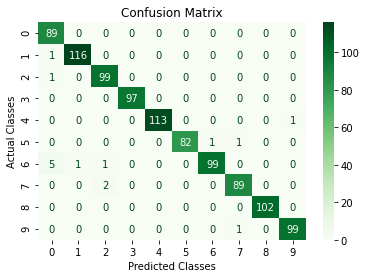

In [18]:
%%time
# Test report for HSQGL12+OBD method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'MNIST' \
  --input_model 'HSQGL12_OBD' --output_model 'HSQGL12_OBD'

In [23]:
# Print Model Sizes
!ls -as models

total 1594884
     4 .        0 for_models.txt  524640 HSQGL12.pt  524640 vgg.pt
     4 ..  327688 HSQGL12_OBD.pt  217908 OBD.pt


In [24]:
%%time
# Pruning the OBD pruned model using HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --train_epoch 20 --reg_name 'HSQGL12' --ds_name 'MNIST' \
  --input_model 'OBD' --output_model 'OBD_HSQGL12' --landa 1e-5

MNIST
Using CUDA...
Using Regularization:  HSQGL12
Accuracy on  val :0.987 	 Loss:0.037
Retraining with regularization ... 


Accuracy on  val :0.976 	 Loss:0.075
Accuracy on  val :0.984 	 Loss:0.049
Accuracy on  val :0.971 	 Loss:0.089
Accuracy on  val :0.978 	 Loss:0.056
Accuracy on  val :0.982 	 Loss:0.060
Accuracy on  val :0.980 	 Loss:0.075
Accuracy on  val :0.986 	 Loss:0.044
Accuracy on  val :0.977 	 Loss:0.078
Accuracy on  val :0.985 	 Loss:0.044
Accuracy on  val :0.982 	 Loss:0.046
Accuracy on  val :0.972 	 Loss:0.087
Accuracy on  val :0.985 	 Loss:0.041
Accuracy on  val :0.983 	 Loss:0.048
Accuracy on  val :0.985 	 Loss:0.044
Accuracy on  val :0.978 	 Loss:0.072
Accuracy on  val :0.983 	 Loss:0.050
Accuracy on  val :0.984 	 Loss:0.042
Accuracy on  val :0.990 	 Loss:0.041
Accuracy on  val :0.985 	 Loss:0.048
Accuracy on  val :0.979 	 Loss:0.068

Finished fine tuning.
Accuracy on  test :0.984 	 Loss:0.056
CPU times: user 15min 59s, sys: 25.6 s, total: 16min 25s
Wall time: 16min 44s


In [25]:
!ls -as models

total 1812792
     4 .        0 for_models.txt  524640 HSQGL12.pt	 217908 OBD.pt
     4 ..  327688 HSQGL12_OBD.pt  217908 OBD_HSQGL12.pt  524640 vgg.pt


MNIST
Using CUDA...
Accuracy on  test :0.982 	 Loss:0.070
ACC=0.98
0:0.99	1:1.00	2:1.00	3:0.99	4:0.99	5:0.99	6:0.96	7:1.00	8:1.00	9:0.99
FNR:0.02, FPR:0.00
TNR:1.00, TPR:0.98
CPU times: user 2.52 s, sys: 495 ms, total: 3.02 s
Wall time: 3.4 s


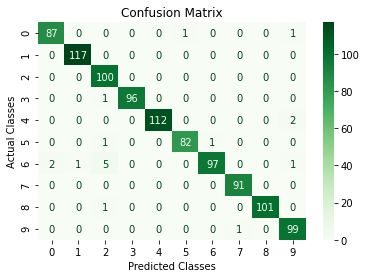

In [26]:
%%time
# Test report for OBD+HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'MNIST' \
  --input_model 'OBD_HSQGL12' --output_model 'OBD_HSQGL12'

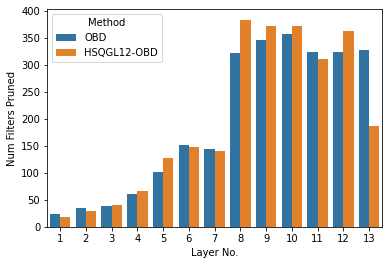

In [28]:
%matplotlib inline
# نمایش تعداد فیلترهای هرس شده در هر لایه
pkl_file = open('MNIST_OBD_dic.pkl','rb')
dic = pkl.load(pkl_file)
dic_obd = bar_filters_pruned(dic)

pkl_file = open('MNIST_HSQGL12_OBD_dic.pkl','rb')
dic = pkl.load(pkl_file)
dic_reg_obd = bar_filters_pruned(dic)

d = {
    'OBD': dic_obd,
    'HSQGL12-OBD': dic_reg_obd
}
df = pd.DataFrame(d)
df1 = df.stack().reset_index().rename(columns={'level_1': 'Method', 0: 'Num Filters Pruned'})
df1.rename(columns={"level_0": "Layer No."},inplace=True)
sns.barplot(x=df1['Layer No.'], y='Num Filters Pruned', data=df1, hue='Method')

In [29]:
!ls -as models

total 1812792
     4 .        0 for_models.txt  524640 HSQGL12.pt	 217908 OBD.pt
     4 ..  327688 HSQGL12_OBD.pt  217908 OBD_HSQGL12.pt  524640 vgg.pt


In [43]:
models_dir = 'models/'
eps = 1e-4
model = torch.load('models/vgg.pt', map_location=lambda storage, loc: storage)
te, _ = num_parameters(model,eps)
print('Total Parameters:', te)
mdl_list = ['vgg.pt', 'HSQGL12.pt', 'OBD.pt', 'HSQGL12_OBD.pt', 'OBD_HSQGL12.pt']
print('MDL \t\t ne \t\t ze \t\t ze/te \t 1-ze/te ne/te \t 1-ne/te ')
print('MDL \t ne \t ze \t ze/te \t 1-ze/te \t ne/te \t 1-ne/te ')
for mdl in mdl_list:
  model_file_name = models_dir+mdl
  model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
  num_el, ze = num_parameters(model,eps)
  print("{:15s}\t {} \t {} \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f}".format(\
          mdl,num_el, ze, ze/te, 1-ze/te, num_el/te, 1-num_el/te))


Total Parameters: 134289088
MDL 		 ne 		 ze 		 ze/te 	 1-ze/te ne/te 	 1-ne/te 
MDL 	 ne 	 ze 	 ze/te 	 1-ze/te 	 ne/te 	 1-ne/te 
vgg.pt         	 134289088 	 1772756 	 0.013 	 0.987 	 1.000 	 0.000
HSQGL12.pt     	 134289088 	 15606538 	 0.116 	 0.884 	 1.000 	 0.000
OBD.pt         	 55769688 	 577319 	 0.004 	 0.996 	 0.415 	 0.585
HSQGL12_OBD.pt 	 83872986 	 865776 	 0.006 	 0.994 	 0.625 	 0.375
OBD_HSQGL12.pt 	 55769688 	 2016401 	 0.015 	 0.985 	 0.415 	 0.585


In [45]:
!zip -r MNIST.zip ./MNIST*.*
files.download('MNIST.zip')

updating: MNIST_HSQGL12_cm.pkl (deflated 56%)
updating: MNIST_HSQGL12_OBD_cm.pkl (deflated 59%)
updating: MNIST_HSQGL12_OBD_dic.pkl (deflated 32%)
updating: MNIST_loss.pkl (deflated 9%)
updating: MNIST_OBD_cm.pkl (deflated 54%)
updating: MNIST_OBD_dic.pkl (deflated 33%)
updating: MNIST_OBD_HSQGL12_cm.pkl (deflated 56%)
updating: MNIST_vgg_cm.pkl (deflated 55%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>